# Setup

In [1]:
import random
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# Loading Data

In [2]:
df = pd.read_csv("Q1data.csv")
df.head()

,x,y,z,labels
0,347.152097,-1.649685,-144.504509,1
1,119.250367,-6.984360,29.078580,1
2,3.127854,-7.509833,59.059293,1
3,-221.102032,-7.183089,629.935385,-1
4,180.430681,-18.881190,-11.225018,1


In [48]:
y = df['labels'].to_numpy()
x = df.drop(columns=["labels"]).to_numpy()

# Perceptron

In [205]:
class Perceptron() : 

    def __init__(self, dim = 3, lr = 1, verbose = 1) : 
        self.w = np.random.rand(dim) * 100
        self.bias = random.random()

        self.lr = lr
        self.iter = 0
        self.verbose = verbose

    def sign(self, x) : 
        if(x >= 0) :
            return 1
        return -1

    def misclass(self, x, y) :
        for i in range(len(x)) : 
            
            y_hat = self.sign(np.dot(self.w, x[i]) + self.bias)
            
            if(y_hat != y[i]) : 
                return i
        
        return -1

    def update_weight(self, miss) : 
        self.w += self.lr * (x[miss] * y[miss])
        self.bias += self.lr * (1 * y[miss])

    def fit(self, x, y) : 
        iteration = 1
        while(True) : 
            miss = self.misclass(x, y)
            if(miss == -1) : 
                self.iter = iteration
                return

            self.update_weight(miss)

            if(self.verbose == 1) :
                if(iteration % 50 == 0) :
                    print("iterations {}, first missclassified data index: {}".format(iteration, miss))

            iteration += 1

    def predict(self, x, y) :
        return self.sign(np.dot(self.w, x[i]) + self.bias)


In [206]:
pc = Perceptron(3)
pc.fit(x, y)

iterations 50, first missclassified data index: 3
iterations 100, first missclassified data index: 19
iterations 150, first missclassified data index: 6
iterations 200, first missclassified data index: 3
iterations 250, first missclassified data index: 3
iterations 300, first missclassified data index: 3


# Plotting

In [207]:
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8')

In [208]:
x_1 = x[y == 1]
x_2 = x[y == -1]

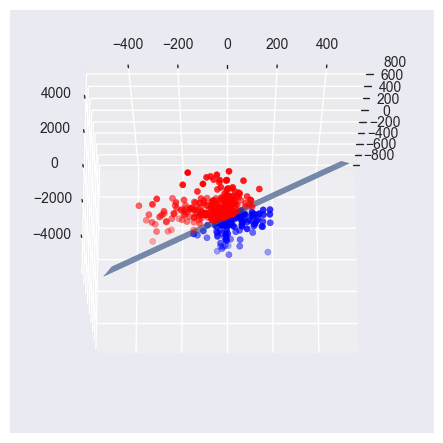

In [209]:
ax = plt.axes(projection='3d')
ax.view_init(elev = -20, azim = 0)

X, Y = np.meshgrid(np.linspace(-500, +500, 60), np.linspace(-500, +500, 60))
Z = -(pc.w[0] * X + pc.w[1] * Y) / pc.w[2]


ax.plot_surface(X, Y, Z)
ax.scatter(x_1[:,0], x_1[:,1], x_1[:,2], c = 'r')
ax.scatter(x_2[:,0], x_2[:,1], x_2[:,2], c = 'b')

plt.show()

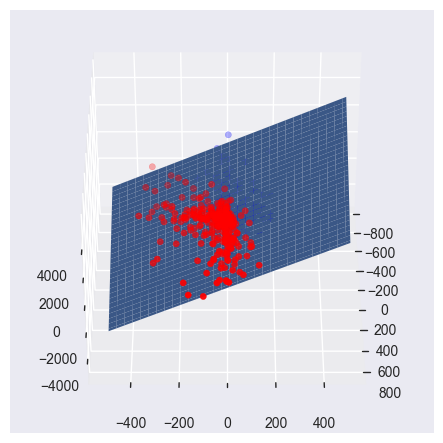

In [210]:
ax = plt.axes(projection='3d')
ax.view_init(elev = 40, azim = 0)

X, Y = np.meshgrid(np.linspace(-500, +500, 60), np.linspace(-500, +500, 60))
Z = -(pc.w[0] * X + pc.w[1] * Y) / pc.w[2]


ax.plot_surface(X, Y, Z)
ax.scatter(x_1[:,0], x_1[:,1], x_1[:,2], c = 'r')
ax.scatter(x_2[:,0], x_2[:,1], x_2[:,2], c = 'b')

plt.show()

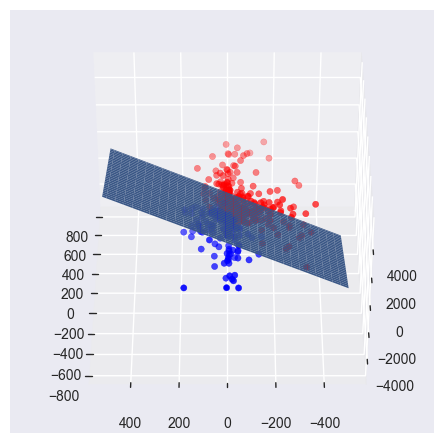

In [211]:
ax = plt.axes(projection='3d')
ax.view_init(elev = 40, azim = 180)

X, Y = np.meshgrid(np.linspace(-500, +500, 60), np.linspace(-500, +500, 60))
Z = -(pc.w[0] * X + pc.w[1] * Y) / pc.w[2]


ax.plot_surface(X, Y, Z)
ax.scatter(x_1[:,0], x_1[:,1], x_1[:,2], c = 'r')
ax.scatter(x_2[:,0], x_2[:,1], x_2[:,2], c = 'b')

plt.show()

# Learning rate

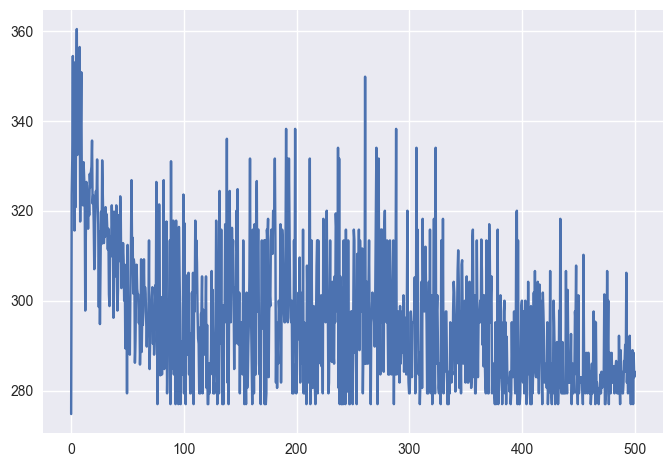

In [219]:
lrs = np.linspace(0.01, 500, 1000)

converge = []
for lr in lrs : 

    cov = 0
    for i in range(5) : 
        pc = Perceptron(dim = 3, lr = lr, verbose = 0)
        pc.fit(x, y)
        cov += pc.iter
    cov /= 5
    converge.append(cov)

plt.plot(lrs, converge)
plt.show()

# MLP (1-layer)

In [2]:
df = pd.read_csv("Q2data.csv")
df.head()

,X,Y
0,0.0,-5.293264
1,0.1,-2.463141
2,0.2,-7.131471
3,0.3,-2.610196
4,0.4,-8.854136


In [9]:
df.shape

(400, 2)

In [3]:
X = df['X'].to_numpy().reshape(400, 1)
Y = df['Y'].to_numpy().reshape(400, 1)

In [369]:
class OneLayerPerceptron() : 
    def transform(self, X, degree) :
        X_poly = np.c_[X]
        for d in range(2, degree + 1):
            X_poly = np.c_[X_poly, X**d]
        
        return np.c_[np.ones((X.shape[0], 1)), X_poly]

    def y_hat(self, X) : 
        return np.dot(X, self.w)
    
    def calc_loss(self, Y, Y_pred) : 

        loss = np.mean((Y_pred - Y)**2)
        self.loss = loss
        return loss

    def gradient_descent(self, X, Y, Y_pred) :
        m = X.shape[0]
        dw = (1/m) * np.dot(X.T, (Y_pred - Y))
        return dw


    def fit(self, X, Y, degree, epochs = 100, lr = 1, display = True, resolution = 100, initial = -1) : 
        
        self.lr = lr
        X_poly = self.transform(X, degree)
    
        self.deg = degree

        if(initial == -1) : 
            self.w = np.random.randn(self.deg + 1, 1)
        else :
            self.w = np.array(initial).reshape((self.deg + 1, 1))

        loss_history = []

        _ = 0
        while((_ < 1000) or abs(loss_history[-1] - loss_history[-1000]) > 0.1) : 

            losses = []

            Y_pred = self.y_hat(X_poly)

            dw = self.gradient_descent(X_poly, Y, Y_pred)

            # ----------------------------------------------------------------------------------
            # --------------------------------------- NEW --------------------------------------
            # ----------------------------------------------------------------------------------

            lr = [self.lr, self.lr]
            for i in range(2, self.deg + 1) : 
                lr.append((self.lr ** i))
                
            lr = np.array(lr).reshape((self.deg + 1, 1))

            self.w -= lr * dw
            
            if(_ % 10000 == 0) : 
                self.lr *= 0.9999
            # ----------------------------------------------------------------------------------
            # --------------------------------------- NEW --------------------------------------
            # ----------------------------------------------------------------------------------
            

            Y_pred = self.y_hat(X_poly)
            l = self.calc_loss(Y, Y_pred)

            losses.append(l)
            loss_history.append(l)

            if(_%resolution == 0 and display == True) :
                print("epoch : {}, loss = {}".format(_, np.mean(losses)))

            _ += 1

        return loss_history

    def predict(self, X) : 
        X = self.transform(X, self.deg)
        return np.dot(X, self.w)

In [332]:
X = df['X'].to_numpy().reshape(400, 1)
Y = df['Y'].to_numpy().reshape(400, 1)

In [5]:
def plot_fit_data(X, Y, pred, degree, size=(8,6)) :
    fig = plt.figure(figsize=size)
    plt.plot(X, Y, 'o')
    plt.plot(X,pred, linewidth=4)

    plt.legend(["Data", "Degree of fit={}".format(degree)])

    plt.xlabel('X')
    plt.ylabel('y')

    plt.title('One Layer Perceptron Network')

    plt.show()

# Degree 1

In [382]:
olp = OneLayerPerceptron()
loss_history = olp.fit(X, Y, degree=1, epochs=10000, lr = 0.000001, display=False)
print("final-loss : {}".format(loss_history[-1]))

final-loss : 4287.077234573744


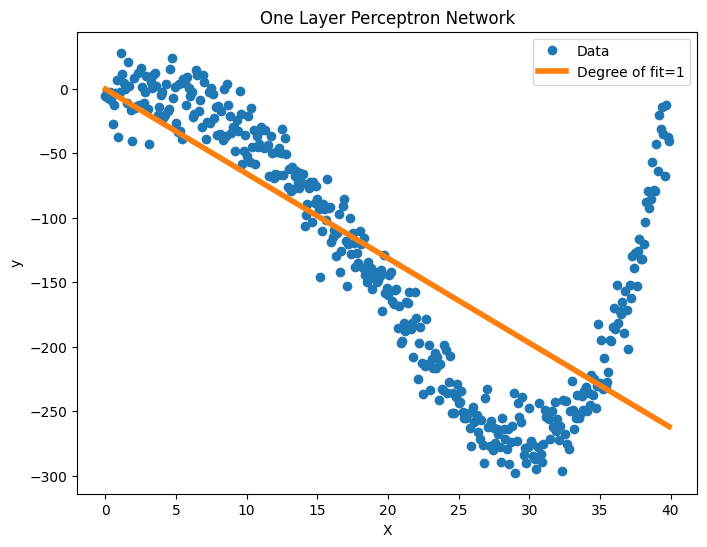

In [389]:
y_pred = olp.predict(X)
plot_fit_data(X, Y, y_pred, 1)

# Degree 2

In [405]:
olp = OneLayerPerceptron()
loss_history = olp.fit(X, Y, degree=2, epochs=30000, lr = 0.000001, display=False)
print("final-loss : {}".format(loss_history[-1]))

final-loss : 3614.3368846614744


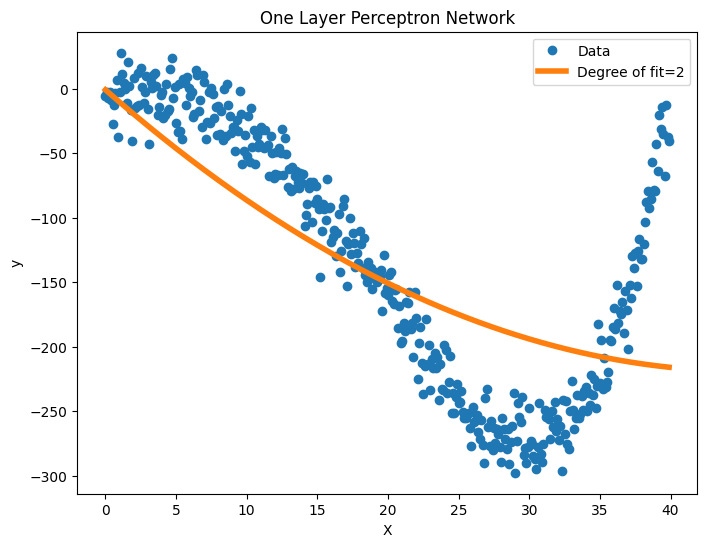

In [407]:
y_pred = olp.predict(X)
plot_fit_data(X, Y, y_pred, 2)

# Degree 3

In [423]:
olp = OneLayerPerceptron()
loss_history = olp.fit(X, Y, degree=3, epochs=20000, lr = 0.0000000001, display=False)
print("final-loss : {}".format(loss_history[-1]))

final-loss : 1433.2171871046596


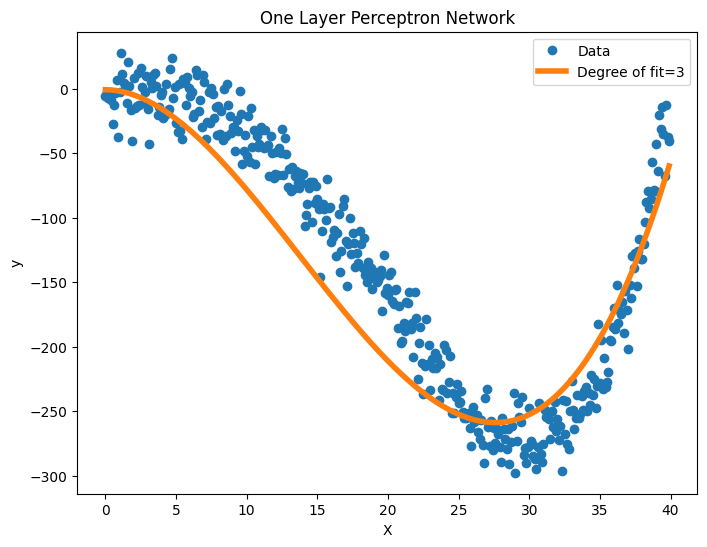

In [424]:
y_pred = olp.predict(X)
plot_fit_data(X, Y, y_pred, 3)

# Degree 4

In [443]:
olp = OneLayerPerceptron()
loss_history = olp.fit(X, Y, degree=4, epochs=100000, lr = 0.000000000001, display=False)
print("final-loss : {}".format(loss_history[-1]))

final-loss : 280.93995102262267


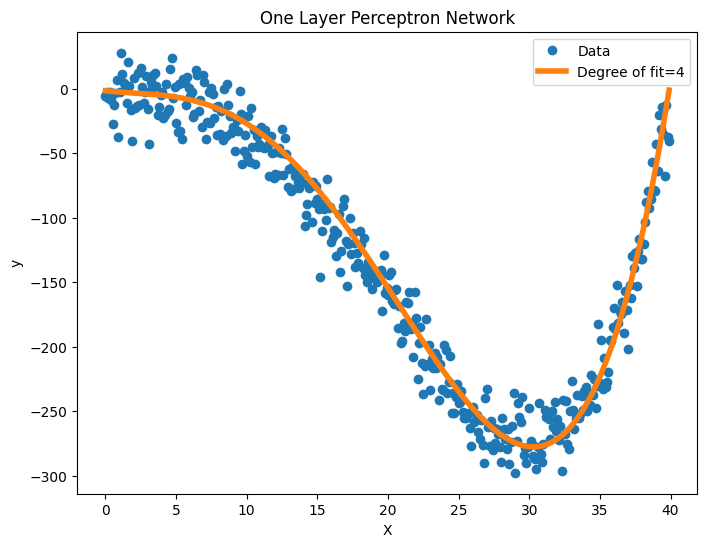

In [444]:
y_pred = olp.predict(X)
plot_fit_data(X, Y, y_pred, 4)

# Overfitting

In [4]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error

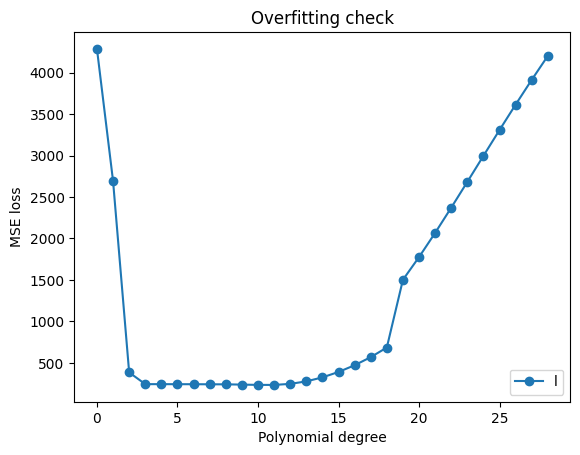

In [20]:
losses = []
for i in range(1, 30) : 

    poly = PolynomialFeatures(degree=i, include_bias=False)
    poly_features = poly.fit_transform(X.reshape(-1, 1))
    poly_reg_model = LinearRegression()
    poly_reg_model.fit(poly_features, Y)
    
    y_pred = poly_reg_model.predict(poly_features)
    losses.append(mean_squared_error(Y, y_pred))

plt.plot(losses, 'o-')
plt.legend("loss")
plt.xlabel("Polynomial degree")
plt.ylabel("MSE loss")
plt.title("Overfitting check")
plt.show()

As we can see the model starts to overfit around `degree = 4` and the loss is increasing, and after the `degree = 20` threshold we can see that the model performance is getting significantly worse

# Train-Test split

In [6]:
def train_test_split(data, ratio = 0.5) :
    train_data = data.sample(frac=ratio,random_state=23)
    test_data = data.drop(train_data.index).sample(frac=1.0)

    x_train = np.array(train_data['X']).reshape(-1,1)
    y_train = np.array(train_data['Y']).reshape(-1,1)
    x_test = np.array(test_data['X']).reshape(-1,1)
    y_test = np.array(test_data['Y']).reshape(-1,1)

    return x_train,y_train,x_test,y_test

test loss on 10% test : 5846.359965271062
test loss on 20% test : 4568.213094076638
test loss on 30% test : 6011.205732766737
test loss on 40% test : 536.8366644856187
test loss on 50% test : 1024.5310560282526
test loss on 60% test : 6038.861419201032
test loss on 70% test : 13906.929263990647
test loss on 80% test : 1405.2031440768515
test loss on 90% test : 18050.14463173231


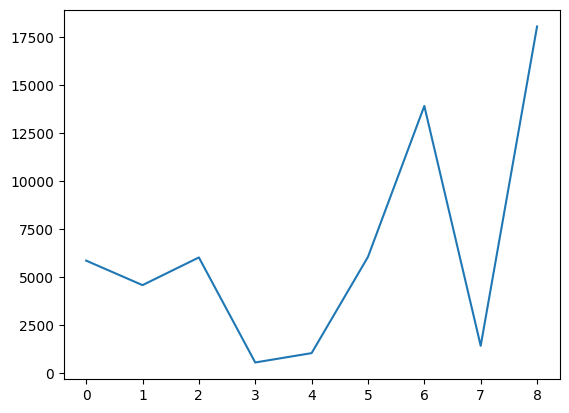

In [25]:
losses = []
for i in range(1, 10) : 
    x_train,y_train,x_test,y_test = train_test_split(df, (100 - i*10)/100)

    bst_loss = 1e9
    for j in range(5) : 
        olp = OneLayerPerceptron()
        loss_history = olp.fit(x_train, y_train, degree=4, epochs=100000, lr = 0.000000000001, display=False)

        y_pred = olp.predict(x_test)
        loss = olp.calc_loss(y_test, y_pred)

        bst_loss = min(bst_loss, loss)

    losses.append(bst_loss)
    print("test loss on {}% test : {}".format(i*10, bst_loss))
    

plt.plot(losses)

As we can see, the subtle changes are due to the randomness of the initial weights, however we can see that the more we increase the test to train ratio, the models evaluation becomes a bit more generalized however if we exceed over around 40% we can see that the model is now somewhat **too generalized** and can not understand the pattern fully which results in the increase of MSE loss function

# Regularization

In [370]:
class Ridge(OneLayerPerceptron) :

    def __init__(self, lamda) : 
        self.lamda = lamda

    def gradient_descent(self, X, Y, Y_pred) : 
        m = X.shape[0]
        dw = (2/m) * (np.dot(X.T, (Y_pred - Y))) + self.lamda * self.w
        return dw

    def calc_loss(self, Y, Y_pred) :

        loss = np.mean((Y_pred - Y)**2) + self.lamda * np.sum(self.w**2)
        self.loss = loss
        return loss
    

In [213]:
df = pd.read_csv("Q2data.csv")
X = df['X'].to_numpy().reshape(400, 1)
Y = df['Y'].to_numpy().reshape(400, 1)

In [271]:
ridge_reg.lr

4.3792289824597833e-13

In [353]:
ridge_reg = Ridge(lamda = 0)
loss_history = ridge_reg.fit(X, Y, degree = 4, epochs=500000, lr = 7e-4, display=True, resolution = 10)
print("final-loss : {}".format(loss_history[-1]))

epoch : 0, loss = 1657571276225.5647
epoch : 10, loss = 232313645802.7777
epoch : 20, loss = 35337166341.716576
epoch : 30, loss = 7747154111.112923
epoch : 40, loss = 3747063619.4930058
epoch : 50, loss = 3076466044.123186
epoch : 60, loss = 2886161032.8264813
epoch : 70, loss = 2769334380.857843
epoch : 80, loss = 2666727004.712558
epoch : 90, loss = 2569418338.974135
epoch : 100, loss = 2475935857.5866914
epoch : 110, loss = 2385939034.437318
epoch : 120, loss = 2299267289.685567
epoch : 130, loss = 2215792664.2194304
epoch : 140, loss = 2135396290.412699
epoch : 150, loss = 2057964419.9673994
epoch : 160, loss = 1983387627.8906312
epoch : 170, loss = 1911560549.3481011
epoch : 180, loss = 1842381711.8123596
epoch : 190, loss = 1775753388.2378802
epoch : 200, loss = 1711581458.2669435
epoch : 210, loss = 1649775275.0237556
epoch : 220, loss = 1590247536.9084876
epoch : 230, loss = 1532914164.1379423
epoch : 240, loss = 1477694179.8452332
epoch : 250, loss = 1424509595.5679345
epoch 

KeyboardInterrupt: 

### Works the same as before with $\lambda = 0$

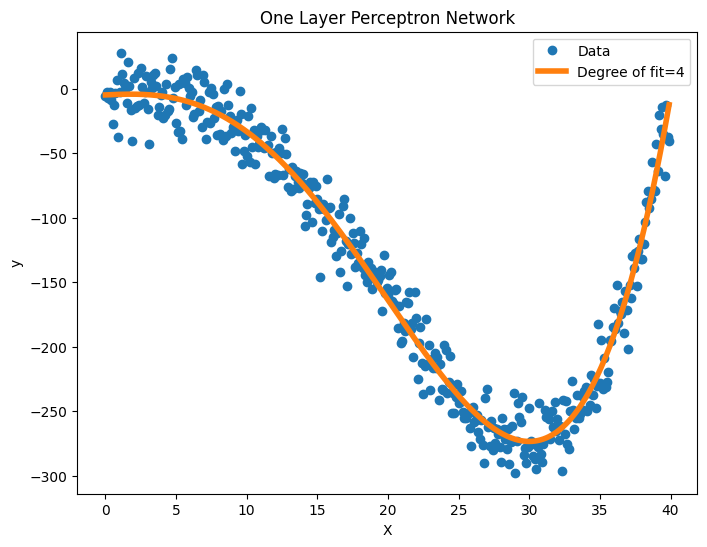

In [290]:
y_pred = ridge_reg.predict(X)
plot_fit_data(X, Y, y_pred, 4)

# $\lambda = 100$

In [291]:
ridge_reg = Ridge(lamda = 100)
loss_history = ridge_reg.fit(X, Y, degree = 4, epochs=500000, lr = 7e-4, display=True, resolution = 10)
print("final-loss : {}".format(loss_history[-1]))

epoch : 0, loss = 15914536273.133766
epoch : 10, loss = 3559382082.435019
epoch : 20, loss = 927443943.2590798
epoch : 30, loss = 321410705.75452954
epoch : 40, loss = 168873682.341153
epoch : 50, loss = 121250228.72578794
epoch : 60, loss = 99018683.55676088
epoch : 70, loss = 83939017.95471862
epoch : 80, loss = 71787477.43742394
epoch : 90, loss = 61499444.572346374
epoch : 100, loss = 52704105.70390491
epoch : 110, loss = 45183429.73959105
epoch : 120, loss = 38761493.77782753
epoch : 130, loss = 33284576.42886427
epoch : 140, loss = 28617906.610715114
epoch : 150, loss = 24644363.156738132
epoch : 160, loss = 21262909.05405858
epoch : 170, loss = 18386783.410077807
epoch : 180, loss = 15941682.135571513
epoch : 190, loss = 13864065.068302255
epoch : 200, loss = 12099643.690180901
epoch : 210, loss = 10602058.457537415
epoch : 220, loss = 9331734.657286357
epoch : 230, loss = 8254898.389000257
epoch : 240, loss = 7342732.827816417
epoch : 250, loss = 6570655.9319935115
epoch : 260,

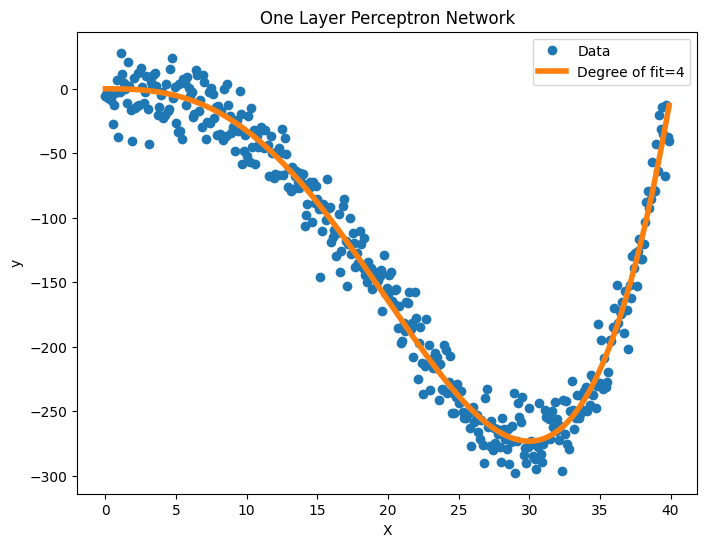

In [292]:
y_pred = ridge_reg.predict(X)
plot_fit_data(X, Y, y_pred, 4)

#### Convergence was really quick

# Now with $\lambda = 100000$

In [378]:
ridge_reg = Ridge(lamda = 100000)
loss_history = ridge_reg.fit(X, Y, degree = 4, lr = 1.5e-5, display=True, resolution = 100, initial = [-1.12, -6.52, 0, 0, 0])
print("final-loss : {}".format(loss_history[-1]))

epoch : 0, loss = 1149885.3334743525
epoch : 100, loss = 26347.306281153164
epoch : 200, loss = 25519.465570284723
epoch : 300, loss = 24734.20126983717
epoch : 400, loss = 23989.37079788538
epoch : 500, loss = 23282.938267651545
epoch : 600, loss = 22612.969201877022
epoch : 700, loss = 21977.62550836234
epoch : 800, loss = 21375.160703787686
epoch : 900, loss = 20803.915373561606
epoch : 1000, loss = 20262.312856050037
epoch : 1100, loss = 19748.855140112137
epoch : 1200, loss = 19262.1189654154
epoch : 1300, loss = 18800.75211552192
epoch : 1400, loss = 18363.469894231042
epoch : 1500, loss = 17949.05177613318
epoch : 1600, loss = 17556.338222775245
epoch : 1700, loss = 17184.22765626288
epoch : 1800, loss = 16831.673582527248
epoch : 1900, loss = 16497.68185686807
epoch : 2000, loss = 16181.30808474849
epoch : 2100, loss = 15881.655151164352
epoch : 2200, loss = 15597.870872239411
epoch : 2300, loss = 15329.145763011382
epoch : 2400, loss = 15074.710915671405
epoch : 2500, loss = 1

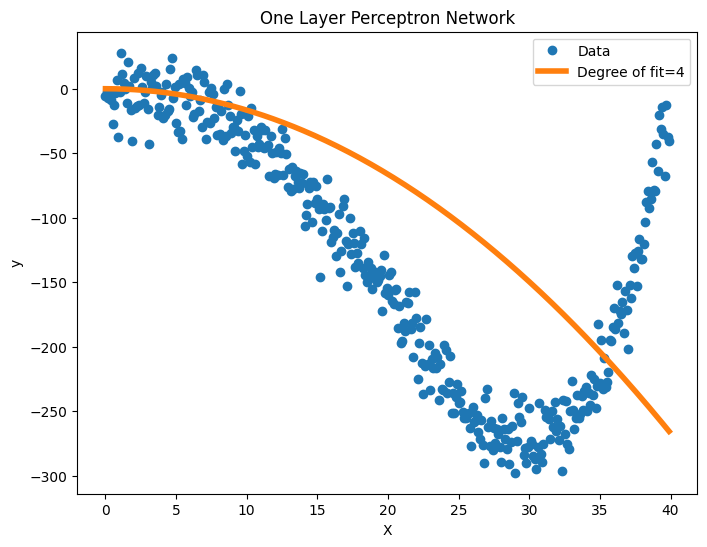

In [379]:
y_pred = ridge_reg.predict(X)
plot_fit_data(X, Y, y_pred, 4)

#### As we can see by having a large $\lambda$ the model tend to be too simple that it cannot fit well

# Mcculloch-Pitts 

In [380]:
W = [[-1, +1.5, +0.5],
     [-0.5, +1, +1],
     [+1, +1, +0.5]]

In [383]:
class mp_neuron() : 

    def __init__(self, threshold = 1) : 
        self.threshold = threshold

    def forward(self, x, w) : 
        x = np.array(x)
        w = np.array(w)
        return np.sum(x * w) >= self.threshold

In [385]:
inputs = [[0, 0, 0], [1, 0, 0], [0, 0, 1], [1, 0, 1], [0, 1, 0], [1, 1, 0], [0, 1, 1], [1, 1, 1]]

outputs = [mp_neuron() for i in range(3)]
for x in inputs : 
    res = []
    for j in range(len(outputs)) : 
        y = outputs[j]
        res.append(int(y.forward(x, W[j])))
        
    print("input : {} -> output : {}".format(x, res))

input : [0, 0, 0] -> output : [0, 0, 0]
input : [1, 0, 0] -> output : [0, 0, 1]
input : [0, 0, 1] -> output : [0, 1, 0]
input : [1, 0, 1] -> output : [0, 0, 1]
input : [0, 1, 0] -> output : [1, 1, 1]
input : [1, 1, 0] -> output : [0, 0, 1]
input : [0, 1, 1] -> output : [1, 1, 1]
input : [1, 1, 1] -> output : [1, 1, 1]
